In [1]:
from pathlib import Path
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras import models
from keras import layers


In [2]:
### Set Variables
IMAGE_SIZE = "300p"  # Options include 300p, 500p, 720p, fullsize
IMAGE_HEIGHT = 225  # The height images should be rescaled to
MIN_SAMPLES = 10  # The minimum number of samples needed to be included in a prediction

# These variables shouldn't have to change
DATA_PATH = Path("./data/fungi-clef-2025")
MD_PATH = DATA_PATH / "metadata/FungiTastic-FewShot"
IMAGE_PATH = DATA_PATH / "images/FungiTastic-FewShot"

In [3]:
# Load the metadata for each split
md_train = pd.read_csv(MD_PATH / "FungiTastic-FewShot-Train.csv")
md_val = pd.read_csv(MD_PATH / "FungiTastic-FewShot-Val.csv")
md_test = pd.read_csv(MD_PATH / "FungiTastic-FewShot-Test.csv")

# Label each split
md_train["split"] = "train"
md_val["split"] = "val"
md_test["split"] = "test"

# Join all of the data together
full_df = pd.concat([md_train, md_val, md_test])

In [4]:
# Add the full location for each image
full_df["image_path"] = full_df.apply(
    lambda row: IMAGE_PATH / f"{row['split']}/{IMAGE_SIZE}/{row['filename']}", axis=1
)

In [5]:
# Filter out all fungi that don't have at least 10 samples throughout the full dataset
class_counts = full_df["class"].value_counts()
frequent_classes = class_counts[class_counts >= MIN_SAMPLES].index
filtered_df = full_df[full_df["class"].isin(frequent_classes)]

In [6]:
# Load all of the images and labels
images = []
labels = []

for idx, row in filtered_df.iterrows():
    # Load and save the image as an array
    img = load_img(row["image_path"])
    img_arr = img_to_array(img)
    images.append(img_arr)

    # Append the class to the list of labels
    labels.append(row["class"])

# This won't work because all of the images are a different size
# Do we want to crop them all?
# images = np.stack(images)

(array([1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 1.500e+01, 1.300e+01,
        5.200e+01, 2.210e+02, 3.800e+02, 2.205e+03, 1.003e+03, 3.370e+03,
        5.370e+02, 2.670e+02, 1.620e+02, 1.430e+02, 2.140e+02, 6.100e+01,
        7.300e+01, 4.000e+01, 4.400e+01, 2.900e+01, 9.710e+02, 2.100e+01,
        1.500e+01, 6.600e+01, 1.800e+01, 1.000e+01, 1.000e+01, 8.000e+00,
        2.900e+01, 5.000e+00, 4.000e+00, 2.000e+00, 5.000e+00, 1.000e+00,
        0.000e+00, 7.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([ 40.  ,  56.22,  72.44,  88.66, 104.88, 121.1 , 137.32, 153.54,
        169.76, 185.98, 202.2 , 218.42, 234.64, 250.86, 267.08, 283.3 ,
        299.52, 315.74, 331.96, 348.18, 364.4 , 380.62, 396.84, 413.06,
        429.28, 445.5 , 461.72, 477.94, 494.16, 510.38, 526.6 , 542.82,
        559.04, 575.26, 591.48, 607.7 , 623.92, 640.14, 656.36, 672.58,
        688.8 , 

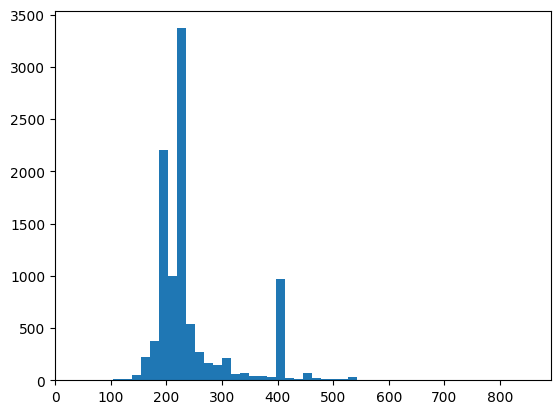

In [7]:
# How tall are all of the images?
heights = [img.shape[0] for img in images]
plt.hist(heights, bins=50)

In [8]:
# Resize images so they're all the same size
resized_images = [tf.image.resize(img, (300, IMAGE_HEIGHT)) for img in images]

In [9]:
# Convert to a numpy array
images_np = np.stack(resized_images)

In [ ]:
# This cell keeps crashing my kernel... so commenting out for now

# Rescale all of the images by dividing each pixel by 255
# scaled_images = images_np / 255.0
# OR
# conv = lambda x: tf.image.convert_image_dtype(x, tf.float32)
# scaled_images = conv(images_np)

In [12]:
# Split the data again


# Augment the training data with some horizontal flips
# This assumes that all of the images are right side up! Might want to examine that
